In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import kagglehub
import os
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests

c:\Users\maiia.kuzmishyna\Desktop\uni\programming\dopp-exe2\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Research Question 1**

**What is the influence of Airbnbs on the local housing markets in London?**

loading data  airbnb

In [3]:
# Define the correct path for the Airbnb data in Google Colab
folder_path_airbnb = "data"
airbnb_csv_path = os.path.join(folder_path_airbnb, "airbnb_dataframe_processed.csv")

# Check if the file exists
if os.path.exists(airbnb_csv_path):
    merged_df = pd.read_csv(airbnb_csv_path)
    print(f"Airbnb dataframe loaded from {airbnb_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {airbnb_csv_path}")



FileNotFoundError: File not found: data\airbnb_dataframe_processed.csv

In [4]:
#### checking if prices of Airbnbs change over the years #####
grouped_df = merged_df.groupby(["year"])["price"].mean()
grouped_df_districts = merged_df.groupby(["year", "neighbourhood"])["price"].mean()
print(merged_df[['year', 'neighbourhood', 'price']].info())
print(merged_df[['year', 'neighbourhood', 'price']].head())
print("This is the grouped dataframe per year: ", grouped_df)

#### plotting the price changes over the years
# Filter years between 2010 and 2024
grouped_df_filtered = grouped_df[(grouped_df.index >= 2010) & (grouped_df.index <= 2024)]

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_filtered.index, grouped_df_filtered.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title("Average Prices by Year (2010-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(grouped_df_districts)
plt.figure(figsize=(20, 12))
for district in grouped_df_districts.index.get_level_values('neighbourhood').unique():
    district_data = grouped_df_districts.xs(district, level='neighbourhood')
    plt.plot(district_data.index, district_data.values, marker='o', linestyle='-', linewidth=2, label=district)

plt.title("Average Prices Airbnb by Year per Districts", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.legend(title="Districts", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)  # Rotated x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'merged_df' is not defined

loading housing data

In [ ]:
# Define the correct path for the housing data in Google Colab
folder_path_housing = "data"
housing_csv_path = os.path.join(folder_path_housing, "housing_dataframe_processed.csv")

# Load the processed housing data
if os.path.exists(housing_csv_path):
    housing_df_monthly = pd.read_csv(housing_csv_path)
    print(f"Housing dataframe loaded from {housing_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {housing_csv_path}")


Housing dataframe loaded from data/housing_dataframe_processed.csv


In [ ]:
#### total London
housing_merged = housing_df_monthly.groupby(["year"])["average_price"].mean()

print(housing_merged)

plt.figure(figsize=(12, 6))
plt.plot(housing_merged.index, housing_merged.values, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title("Average Housing Prices by Year in London", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#### per district
housing_merged_districts = housing_df_monthly.groupby(["year", "area"])["average_price"].mean()


plt.figure(figsize=(20, 12))
for area in housing_merged_districts.index.get_level_values('area').unique():
    area_data = housing_merged_districts.xs(area, level='area')
    plt.plot(area_data.index, area_data.values, marker='o', linestyle='-', linewidth=2, label=area)

plt.title("Average Housing Prices by Year per District in London", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.legend(title="Districts", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:

print("Starting calculations for RQ1 -> What is the influence of hotels and Airbnbs influences the local housing markets and economic activities?")


#################################################
######### correlating housing and airbnb #########
##################################################

#######################
#### per London ########
########################

merged_df_housing_bnb = pd.merge(housing_merged, grouped_df, on="year", how="inner")
print(merged_df_housing_bnb)

correlation = merged_df_housing_bnb['average_price'].corr(merged_df_housing_bnb['price'])

print(f"Correlation between housing prices and Airbnb prices per year over whole London: {correlation:.2f}")

print(housing_df_monthly)


Lagged Correlation

In [ ]:
lagged_correlations_london = {}

# Test lags from 1 to 3 years
for lag in range(1, 4):
    # Shift housing prices by the current lag
    merged_df_housing_bnb[f'housing_lag_{lag}'] = merged_df_housing_bnb['average_price'].shift(lag)

    # Calculate correlation between lagged housing prices and Airbnb prices
    correlation_housing = merged_df_housing_bnb[f'housing_lag_{lag}'].corr(merged_df_housing_bnb['price'])
    lagged_correlations_london[f'Housing Prices Lag {lag}'] = correlation_housing

    # Shift Airbnb prices by the current lag
    merged_df_housing_bnb[f'airbnb_lag_{lag}'] = merged_df_housing_bnb['price'].shift(lag)

    correlation_airbnb = merged_df_housing_bnb[f'airbnb_lag_{lag}'].corr(merged_df_housing_bnb['average_price'])
    lagged_correlations_london[f'Airbnb Prices Lag {lag}'] = correlation_airbnb

print("Lagged Correlations (Whole London):")
for key, value in lagged_correlations_london.items():
    print(f"{key}: {value:.2f}")


correlation_df_london = pd.DataFrame(list(lagged_correlations_london.items()), columns=['Lag', 'Correlation'])

plt.figure(figsize=(10, 6))
plt.bar(correlation_df_london['Lag'], correlation_df_london['Correlation'], color='skyblue')
plt.title("Lagged Correlations Between Housing and Airbnb Prices (Whole London)", fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Granger Test for whole London

In [ ]:
granger_data = merged_df_housing_bnb[['average_price', 'price']].dropna()


# For testing if Airbnb prices Granger-cause housing prices
print("For testing if Airbnb prices Granger-cause housing prices")
grangercausalitytests(granger_data[['average_price', 'price']], maxlag=3)

# For testing if housing prices Granger-cause Airbnb prices
print("Testing if housing prices Granger-cause Airbnb prices")
grangercausalitytests(granger_data[['price', 'average_price']], maxlag=3)


granger_results = {}

# Test Airbnb prices -> housing prices
airbnb_to_housing = grangercausalitytests(granger_data[['average_price', 'price']], maxlag=3, verbose=False)
granger_results['Airbnb -> Housing'] = airbnb_to_housing

# Test housing prices -> Airbnb prices
housing_to_airbnb = grangercausalitytests(granger_data[['price', 'average_price']], maxlag=3, verbose=False)
granger_results['Housing -> Airbnb'] = housing_to_airbnb


visualization_data = []
test_stats = ["ssr_chi2test", "ssr_ftest", "lrtest", "params_ftest"]

for direction, results in granger_results.items():
    for lag, lag_results in results.items():
        for test_stat in test_stats:
            # Extract p-value for the test_stat
            try:
                if isinstance(lag_results[0], dict) and test_stat in lag_results[0]:
                    p_value = lag_results[0][test_stat][1]  # Extract p-value
                    visualization_data.append({
                        "Direction": direction,
                        "Lag": lag,
                        "Test Statistic": test_stat,
                        "p-value": p_value
                    })
            except Exception as e:
                print(f"Error processing {test_stat} for Lag {lag}: {e}")


Visualize Granger Results

In [ ]:
visualization_df = pd.DataFrame(visualization_data)

plt.figure(figsize=(16, 8))
for direction in visualization_df['Direction'].unique():
    for test_stat in visualization_df['Test Statistic'].unique():
        subset = visualization_df[(visualization_df['Direction'] == direction) &
                                   (visualization_df['Test Statistic'] == test_stat)]
        plt.plot(
            subset['Lag'],
            subset['p-value'],
            marker='o',
            label=f"{direction} ({test_stat})"
        )

# Add threshold line
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')

plt.xticks(range(1, 4), labels=[f"Lag {i}" for i in range(1, 4)], fontsize=12)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("p-value", fontsize=14)
plt.title("Granger Causality Results (All Test Statistics) for Whole London", fontsize=16)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlating Housing and Airbnb per District

In [ ]:

housing_df_monthly['area'] = housing_df_monthly['area'].str.lower()
merged_df['neighbourhood'] = merged_df['neighbourhood'].str.lower()

grouped_housing_districts = housing_df_monthly.groupby(["year", "area"])["average_price"].mean().reset_index()
grouped_airbnb_districts = merged_df.groupby(["year", "neighbourhood"])["price"].mean().reset_index()

merged_districts = pd.merge(
    grouped_housing_districts,
    grouped_airbnb_districts,
    left_on=["year", "area"],
    right_on=["year", "neighbourhood"],
    how="inner"
)

print("Merged dataset per district:")
print(merged_districts)

district_correlations = (
    merged_districts.groupby("area")
    .apply(lambda df: df["average_price"].corr(df["price"]))
    .reset_index(name="correlation")
)


print("\nCorrelation between housing and Airbnb prices per district:")
print(district_correlations)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="correlation",
    y="area",
    data=district_correlations.sort_values("correlation", ascending=False),
    palette="coolwarm"
)
plt.title("Correlation between Housing and Airbnb Prices per District", fontsize=16)
plt.xlabel("Correlation", fontsize=14)
plt.ylabel("District (Area)", fontsize=14)
plt.tight_layout()
plt.show()


heatmap_data = merged_districts.pivot_table(
    index="area",
    columns="year",
    values=["average_price", "price"]
).corr().loc["average_price", "price"]

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation'},
    xticklabels=heatmap_data.columns,  # Columns correspond to Airbnb prices
    yticklabels=heatmap_data.index  # Rows correspond to Housing prices
)
plt.title("Correlation Heatmap: Housing vs Airbnb Prices per Year", fontsize=16)
plt.xlabel("Airbnb Prices (Year)", fontsize=14)
plt.ylabel("Housing Prices (Year)", fontsize=14)
plt.tight_layout()
plt.show()

Calculating lagged correlations per districts

In [ ]:

data = merged_districts[['year', 'average_price', 'price']].dropna()


lagged_correlations = {}

for lag in range(1, 4):
    # Shift housing prices by the current lag
    data[f'housing_lag_{lag}'] = data['average_price'].shift(lag)

    # Calculate correlation between lagged housing prices and Airbnb prices
    correlation = data[f'housing_lag_{lag}'].corr(data['price'])
    lagged_correlations[f'Housing Prices Lag {lag}'] = correlation

    # Shift Airbnb prices by the current lag
    data[f'airbnb_lag_{lag}'] = data['price'].shift(lag)

    # Calculate correlation between lagged Airbnb prices and housing prices
    correlation = data[f'airbnb_lag_{lag}'].corr(data['average_price'])
    lagged_correlations[f'Airbnb Prices Lag {lag}'] = correlation

print("Lagged Correlations:")
for key, value in lagged_correlations.items():
    print(f"{key}: {value:.2f}")


##### lagged correlations per district

lagged_correlations_per_district = {}


for district in merged_districts['area'].unique():
    district_data = merged_districts[merged_districts['area'] == district][['year', 'average_price', 'price']].dropna()

    district_lagged_corr = {}

    # Test lags from 1 to 3 years
    for lag in range(1, 4):
        # Shift housing prices by the current lag
        district_data[f'housing_lag_{lag}'] = district_data['average_price'].shift(lag)

        corr_housing = district_data[f'housing_lag_{lag}'].corr(district_data['price'])
        district_lagged_corr[f'Housing Prices Lag {lag}'] = corr_housing

        district_data[f'airbnb_lag_{lag}'] = district_data['price'].shift(lag)

        corr_airbnb = district_data[f'airbnb_lag_{lag}'].corr(district_data['average_price'])
        district_lagged_corr[f'Airbnb Prices Lag {lag}'] = corr_airbnb

    lagged_correlations_per_district[district] = district_lagged_corr


print("Lagged Correlations per District:")
for district, correlations in lagged_correlations_per_district.items():
    print(f"\nDistrict: {district}")
    for lag, value in correlations.items():
        print(f"  {lag}: {value:.2f}")


# Convert lagged correlations dictionary to a DataFrame
lagged_corr_df = pd.DataFrame.from_dict(lagged_correlations_per_district, orient='index')

# Extract data for Lag 1
lag_1_data = lagged_corr_df[['Housing Prices Lag 1', 'Airbnb Prices Lag 1']].reset_index()
lag_1_data.rename(columns={'index': 'District'}, inplace=True)

# Extract data for Lag 2
lag_2_data = lagged_corr_df[['Housing Prices Lag 2', 'Airbnb Prices Lag 2']].reset_index()
lag_2_data.rename(columns={'index': 'District'}, inplace=True)


plt.figure(figsize=(15, 8))
lag_1_data.set_index('District').plot(kind='bar', figsize=(15, 8))
plt.title("Lagged Correlations (Lag 1 Year)", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Lag 1 Correlations", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
lag_2_data.set_index('District').plot(kind='bar', figsize=(15, 8))
plt.title("Lagged Correlations (Lag 2 Years)", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Lag 2 Correlations", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Research Question 2

Let's look back at our broad question for a moment: What impact do hotels or Airbnb apartments have on cities in Europe?

Since hotels and airbnb apartments could be considered a proxy for tourism, our broad question can also be paraphrased as “What impact does tourism have on cities in Europe?”

Intuitively, cities that attract many tourists are likely to see a more significant increase in the number of cafes, restaurants and other tourist-relevant services than less popular tourist destinations, since there is a higher demand for them.

Therefore, it would be logical to investigate if there is a correlation between the number of hotels and other short-term rental options and the number of cafes and restaurants in european cities.

### Selection of cities

The first city we decided to look it is London, as to stay consistent with the previous data sets.

However, London is simultaneously a big city and attracts a lot of tourists, hence it represents only one class of european cities.

To fully investigate the effect of hotels, we would need to look at at least representatives of two other classes:
- a small tourist-attractive city
- a small city that does not known for its tourist attractions.


_Note: It would be ideal to also analyze a big non tourist-attractive city, however, it proved hard to find a representative of this class._

In order to minimize the cultural, political and geographical differences between the cities, it makes sense to stay in one country, namely England, for the analysis.

As the other two cities, we have selected Bath and St. Albans:
 - Bath is a small city with a population of about 94 thousand people (2021 Census), however it is known by tourists for its Roman-built public baths.
 - St. Albans is a city of comparable population to Bath, however it is known to be more of a locals-populated city rather than a tourist-attracting one.

## Loading, merging and cleaning the data

We collected the data needed for the analysis from the [OpenStreetMaps](https://www.openstreetmap.org/) via the [Overpass Api](https://wiki.openstreetmap.org/wiki/Overpass_API).

Since the running time of one Overpass query was approximately 17sec, we extracted the data collection process from this notebook and have stored the collected data in csv files for fast access.

The details of the data collection can be found *INSERT PATH HERE*, but we want to mention a couple of important points about the process here:
- The range of years is [2013, 2024], except for St. Albans where early data is missing.
- Yearly counts are calculated as mean of monthly count for each month in a given year.
- Monthly count is the count at the 1st day of the month.
- We took care of ambiguity in OpenStreetMaps area names by making sure our area filter returns only the location we are interested in (e.g. we took care of filtering out anything named "London" besides the capital of England)

In [ ]:
years = range(2013, 2025)
areas = ["London", "St_Albans", "Bath"]
amenities = ["cafe", "restaurant", "car_rental", "hotel"]
dependent_amenities = list(filter(lambda x: x != "hotel", amenities))

In [ ]:
amenity_df_dict = {}
area_df_dict = {}

for amenity_index in range(0, len(amenities)):
    amenity = amenities[amenity_index]
    amenity_df = pd.DataFrame(index = years)

    for area_index in range(0, len(areas)):
        area = areas[area_index]

        area_amenity_df = pd.read_csv(f'../data/amenities/{area}/{amenity}.csv')
        area_amenity_df.set_index(['year'], inplace=True)

        if (not area in area_df_dict):
            area_df_dict[area] = pd.DataFrame(index = years)

        area_df = area_df_dict[area]
        area_df[amenity] = area_amenity_df['count']

        area_amenity_df[area] = area_amenity_df['count']
        area_amenity_df.drop(['area', 'count', 'amenity'], axis=1, inplace=True)


        amenity_df = amenity_df.merge(area_amenity_df, how='outer', left_index=True, right_index=True)

    amenity_df_dict[amenity] = amenity_df


Now we have our data conveniently merged in both ways: grouped by amenity type and grouped by area.

Amenity counts for St. Albans:

In [ ]:
display(area_df_dict['St_Albans'])

Immediately we can see that St. Albans values are missing before the year 2019. Since having zeroes for all amenity counts can impact our correlation calculations, we should remove years [2013, 2018] from St. Albans data frame.

In [ ]:
area_df_dict['St_Albans'].drop(range(2013,2019), inplace=True, errors='ignore')

for area in areas:
    print(area)
    display(area_df_dict[area])

## Visualizations of the data

Now that we have the data cleaned and conveniently merged for analysis, let's take a first look at it by plotting each amenity count per location in one plot.

In [ ]:
# Helper function used in interpretation section

def plot_amenity(amenity):
    colors = {
        'hotel': 'blue',
        'cafe': 'orange',
        'restaurant': 'red',
        'car_rental': 'green',
    }

    fig, ax = plt.subplots(1, 3, figsize=(15, 3))

    for area_index in range(0, len(areas)):
        area = areas[area_index]
        years = area_df_dict[area].index
        x = area_df_dict[area][amenity]

        # Plot the hotels line
        ax[area_index].plot(years, x, label=amenity.capitalize(), marker='o', color=colors[amenity])

        ax[area_index].set_title(f'{amenity.capitalize()} in {area}')
        ax[area_index].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

colors = ['orange', 'red', 'green']

for area_index in range(0, len(areas)):
    area = areas[area_index]
    years = area_df_dict[area].index
    x = area_df_dict[area]["hotel"]

    # Plot the hotels line
    ax[area_index].plot(years, x, label='Hotels', marker='o', color='blue')

    # Plot the amenity lines
    for amenity_index in range(0, len(dependent_amenities)):
        amenity = dependent_amenities[amenity_index]
        y = area_df_dict[area][amenity]

        ax[area_index].plot(years, y, label=amenity.capitalize(), linestyle='--', marker='s', color=colors[amenity_index])


    ax[area_index].set_title(f'{area}')
    ax[area_index].legend()

plt.tight_layout()
plt.show()

Initially, what we can see is that for all three cities the counts of cafes and restaurants seems to be highly correlated, and that the number of car rentals and hotels is significantly lower.

Due to this discrepancy in the counts scale, it is hard to read the correlation between the number of hotels and other amenities directly from the plot, and another analysis tool should be used for that purpose: scatter matrix and correlation coefficients.


## Scatter matrix & Correlation coefficients

In [ ]:
for area in areas:
    sm = pd.plotting.scatter_matrix(area_df_dict['London'], figsize=(5, 5), diagonal='hist')
    plt.suptitle(f'Scatter matrix for {area}')
    [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
    [s.get_xaxis().set_label_coords(0.5,-0.5) for s in sm.reshape(-1)]
    [s.get_yaxis().set_label_coords(-0.8,0.5) for s in sm.reshape(-1)]


The above scatter matrices confirm very strong positive correlation between the number of cafes and restaurants, however they also highlight string correlation between number of car rentals and number of cafes. The correlation of each dependent amenity with the number of hotels seems weak and rather arbitrary. Let us now confirm it with correlation coefficients:

In [ ]:
corr_matrix = np.empty(shape=(len(areas), len(dependent_amenities)))

print('Pearson correlation coefficients:')

for area_index in range(0, len(areas)):
    print()
    for amenity_index in range(0, len(dependent_amenities)):
        area = areas[area_index]
        amenity = dependent_amenities[amenity_index]
        hotel_counts = area_df_dict[area]['hotel']
        amenity_counts = area_df_dict[area][amenity]
        corr_matrix[area_index][amenity_index] = np.corrcoef(hotel_counts, amenity_counts).round(decimals=3)[0][1]
        print(f'{area} (hotels, {amenity}) = {corr_matrix[area_index][amenity_index]}')


## Interpreting the results

In general, for all cities, we didn't find evidence of a strong positive correlation between the number of amenities used by tourists and the number of hotels.

Let us now look at the data in more details to try and explain why.

In [ ]:
plot_amenity('hotel')

If we plot just the hotels count throughout the years, we can see that they do not rise monotonically in the contrast to other amenities.

London has a drastic fall in the number of hotels in the years 2020-2022. This fall could be attributed to the Covid pandemic. Although it would be reasonable to expect the number of cafes and restaurants to fall in their time period as well, which we don't see indicated in the data, it can be argued that hotels sustained more damage because they are used almost exclusively by the tourists, while cafes, restaurants and car rentals offer their services to the locals as well. This fall could affect the correlation.

However, an even more important issue is that the absolute number of hotels in St. Albans and Bath is quite low: it never exceeds 10. On such small set of hotels, random events could have a huge relative influence.

Considering the above point, we can hardly make a conclusive statement about the correlation of number of hotels and other amenities with respect to St. Albans and Bath.

In [ ]:
plot_amenity('cafe')

An interesting observation can be made about the number of cafes (and highly correlated number of restaurants) in all three cities.

For London, the number steadily grows, but the slope (speed of grows) seems to have been affected by Covid.

For St. Albans and Bath, there is a clear stagnating or very slowly rising trend preceded by a rapid increase. One of possible explanations of the rapid increase could be that it depicts increase in awareness about OpenStreetMaps in those two cities and subsequent appearance of mappers who add data points, rather than actual increase in the number of amenities.

In [ ]:
rly

## Conclusion

The most solid result of our analysis with respect to the original research question is that we observed a negative correlation between the number of hotels and other tourist amenities for London:

| Amenities | Corr. vs Hotels|
| --- | --- |
| Cafe | -0.559 |
| Restaurant | -0.6 |
| Car rental | -0.698 |

This surprising result could be explained by the COVID pandemic since we have seen evidence of the dramatic decrease in hotels but not in cafes in the respective time frame.

While we aren't able to confidently state a conclusion regarding the correlation for St. Albans and Bath due to incredibly small absolute number of hotels, we have observed an interesting "rapid increase then stagnation" pattern for both cities, which could reflect addition of the data points to OpenStreetMaps rather than increase in the actual amenity counts.

On this note, an important disclaimer is that we were using exclusively data from OpenStreetMaps which provides no guarantee to be representable of the real amenity counts.


#### What could have been done better:
- Choose cities that are likely to have realistic amenity counts reflected in OpenStreetMaps
- Choose larger cities with higher absolute counts of amenities
- Collect monthly averages rather than yearly
- Replicate the experiment for more european countries


# Research Question 3

The following steps were undertaken to analyze and plot Airbnb and POIs (Points of Interest) in London, with a focus on determining whether hotels and Airbnb apartments are more prevalent and popular in areas with higher densities of POIs and public transport hubs.

1. Data Loading and Preprocessing
    - Dataset POIs (consolidated_pois.geojson) loaded (from before). Contains geospatial information about POIs in multiple countries and filtered for POIs in England (London)
    - Dataset London Boroughs (london_boroughs.geojson) dataset was loaded and processed to include borough  information for analysis and more specifically plotting.
    - Spatial join between the England POIs dataset and the London boroughs dataset performed to filter  POIs located within London boroughs
    - The Airbnb dataset (listings.csv) joined with London borough dataset for adding informations
    - One-hot-Encoding of tags in POI dataset for further analysis
2. Step in next markdown cell after explained steps from 1)

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import numpy as np
import matplotlib.pyplot as plt

gdf = gpd.read_file('data/pois/accomodation+pois/consolidated_pois.geojson')
gdf = gdf.to_crs(epsg=4326)
# Number_of_reviews > 1
#gdf = gdf.loc[gdf['Number_of_reviews'] > 1]
gdf_england = gdf.loc[gdf['country']== 'united-kingdom']
gdf_boroughs = gpd.read_file('data/rq3/london_boroughs.geojson')
gdf_boroughs = gdf_boroughs.to_crs(epsg=4326)

# Prepare the data
gdf_boroughs = gdf_boroughs.reset_index(drop=True)
gdf_boroughs = gdf_boroughs.rename(columns={'name': 'borough_name', 'index': 'borough_id'})
gdf_boroughs = gdf_boroughs.to_crs(epsg=4326)

# Get only the POIs in London
gdf_poi_london =gpd.sjoin(gdf_england, gdf_boroughs, how='inner', predicate='intersects')
gdf_poi_london.rename(columns={'index_right': 'borough_id'}, inplace=True)


# Get Airbnbs and transform to gdf
df_airbnb = pd.read_csv('data/airbnb_london/listings.csv')
gdf_airbnb = gpd.GeoDataFrame(df_airbnb, geometry=gpd.points_from_xy(df_airbnb.longitude, df_airbnb.latitude), crs="EPSG:4326")
airbnb_gdf_london = gpd.sjoin(gdf_airbnb, gdf_boroughs, how='inner', predicate='intersects')
airbnb_gdf_london.rename(columns={'index_right': 'borough_id'}, inplace=True)

# One-hot encoding for tag_value and prefix with tag_
poi_ohe_tags = pd.get_dummies(gdf_poi_london.tag_key, prefix='tag')
# Merge one-hot encoded tags to the original DataFrame nad rename with prefix tag_
gdf_poi_london = gdf_poi_london.merge(poi_ohe_tags, left_index=True, right_index=True)
# Get encoded tags columns for later use
encoded_tag_columns = [col for col in gdf_poi_london.columns if col.startswith('tag_')]

2. Getting Transport Data for further analysis
    - Subset of POIs with tags specifically related to transport (transport-station, train-station, subway-entrance, and bus-station) was extracted
    - For each Airbnb listing, the minimum distance to the closest transport POI was calculated. This is needed for the analysis of the importance if nearby transport stations

In [ ]:
# Get only the transport POIs
transport_tags = ['transport-station', 'train-station', 'subway-entrance', 'bus-station']
gdf_transport_pois = gdf_poi_london[gdf_poi_london['tag_value'].isin(transport_tags)]
# Change the crs to EPSG:27700 (for distance calculation in meters)
gdf_transport_pois = gdf_transport_pois.to_crs(epsg=27700)
airbnb_gdf_london = airbnb_gdf_london.to_crs(epsg=27700)

# Calculate distance between each Airbnb and the closest transport POI
distances_airbnb_transport = []
for idx, airbnb in airbnb_gdf_london.iterrows():
    distances = gdf_transport_pois.geometry.distance(airbnb.geometry)
    distances_airbnb_transport.append(distances.min())

# Add the distances to the Airbnb GeoDataFrame
airbnb_gdf_london['distance_to_transport'] = distances_airbnb_transport
# Change the crs to EPSG:4326
airbnb_gdf_london = airbnb_gdf_london.to_crs(epsg=4326)

3. Grid Creation
    - Grid resolution of 1000 meters (1 km) was chosen to divide London into manageable, uniformly sized cells for spatial aggregation. This was used for simplicity and efficiency reasons
    - Spatial join was performed to assign POIs to the grid cells they intersect
    - Aggregation of POI data (Number if POIs in a Grid, Number of occurences of each tag in a Grid)
    - Aggregation of (Number of Airbnbs in a Grid, avg distance to transport POI of Airbnbs in a Grid)
    

In [ ]:
# Define grid resolution (e.g., 500 meters)
grid_size = 1000  # meters
crs = "EPSG:27700"  # British National Grid (to measure in meters)
gdf_boroughs = gdf_boroughs.to_crs(crs)

# Get bounds of London boroughs
minx, miny, maxx, maxy = gdf_boroughs.total_bounds

# Create grid cells
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)

grid_cells = []
for x in x_coords:
    for y in y_coords:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))

# Create GeoDataFrame for the grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=crs)
grid = gpd.clip(grid, gdf_boroughs)
grid = grid.to_crs("EPSG:4326")
gdf_boroughs = gdf_boroughs.to_crs("EPSG:4326")


# Spatial join to assign POIs to grid cells
poi_in_grid = gpd.sjoin(gdf_poi_london, grid, how='inner', predicate='intersects')
poi_in_grid = poi_in_grid.rename(columns={'index_right': 'index_borough'})

# Count POIs in each grid cell
grid['poi_density'] = poi_in_grid.groupby('index_borough').size()
grid['poi_density'] = grid['poi_density'].fillna(0)

# Get aggregated tag values for each grid cell
aggregated_poi_tags = poi_in_grid.groupby('index_borough')[encoded_tag_columns].sum()
aggregated_poi_tags = aggregated_poi_tags.reset_index()
# Merge the aggregated one-hot encoded tags with the grid
grid = grid.merge(aggregated_poi_tags,left_index=True ,right_index=True,how='left')
grid[encoded_tag_columns] = grid[encoded_tag_columns].fillna(0)

# Spatial join to assign Airbnb listings to grid cells
airbnb_in_grid = gpd.sjoin(airbnb_gdf_london, grid, how='inner', predicate='intersects')
poi_in_grid = poi_in_grid.rename(columns={'index_right': 'index_borough'})
# Calculate Airbnb metrics for each grid cell
grid['listing_count'] = airbnb_in_grid.groupby('index_right').size()
grid['average_reviews'] = airbnb_in_grid.groupby('index_right')['number_of_reviews_ltm'].mean()
grid['average_reviews'] = grid['average_reviews'].fillna(0)
grid['listing_count'] = grid['listing_count'].fillna(0)
# Calculate the average distance to transport POIs for each grid cell
grid['average_distance_to_transport'] = airbnb_in_grid.groupby('index_right')['distance_to_transport'].mean()

4. Plot  Airbnbs, POIs, and Transport POIs in London
- Get a basic understanding of data and how it plays out.
- Is clustered, hence abstraction is needed

In [ ]:
# Plot the data on a map
fig, ax = plt.subplots(figsize=(12, 12))

# Add data to the plot
gdf_boroughs.boundary.plot(ax=ax, color='black', linewidth=0.5, label='Borough Boundary')
airbnb_gdf_london.plot(ax=ax, color='red', markersize=2, alpha=0.7, label='Airbnb')
gdf_poi_london.plot(ax=ax, color='blue', markersize=2, alpha=0.7, label='POI')
gdf_transport_pois.to_crs(epsg=4326).plot(ax=ax,color='#39FF14',markersize=12,alpha=1.0, label='Transport POI')

# Add grid cells
grid.boundary.plot(ax=ax, color='gray', linewidth=0.3, linestyle='--', alpha=0.5, label='Grid')

# Add rest of the plot elements
plt.legend(loc='upper left')
ax.set_title('Airbnbs, POIs, and Transport POIs in London', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Minimize unused space around the plot
ax.set_xlim(gdf_boroughs.total_bounds[[0, 2]])
ax.set_ylim(gdf_boroughs.total_bounds[[1, 3]])

plt.show()

5. Heatmaps of Airbnb listings and POIs
- Abstraction needed for less cluttered analysis


In [ ]:
# POI Density Heatmap with Borough Boundaries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grid.plot(column='poi_density', cmap='OrRd', legend=True, ax=ax)
gdf_boroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
plt.title('POI Density Heatmap in London')
plt.show()

# Listing Count Heatmap with Borough Boundaries
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grid.plot(column='listing_count', cmap='OrRd', legend=True, ax=ax)
gdf_boroughs.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
plt.title('Listing Count Heatmap in London')
plt.show()

6. Correlation of different features with listing_count (how many Airbnbs in one Grid) to get indicators for influence of Count of Airbnb listings - Key observations

- Strongest Positive Correlation:
    - poi_density: areas with high density of POIs tens to have more Airbnb listings
    - index_borough: borough-specific factors also play a role in determining the number of listings
- Moderate Positive Correlation:
    - average_reviews: grid cells with higher average reviews per Airbnb listing have slightly higher densities of listings. Probably due to popular areas with greater demand
- Moderate Negative Correlation:
    - average_distance_to_transport: farther from transport POIs tend to have fewer Airbnb listings. Hence, the proximity of transportation spots seems to be important

In [ ]:
# Compute correlation with listing_count and plot
correlations = grid[grid.select_dtypes(include=['float64', 'int64']).columns].corr()['listing_count'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations[1:].plot(kind='barh')
plt.title('Correlation of Listing Count with Other Features in Grid Cells')
plt.ylabel('Feature')
plt.xlabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Research Question 4**

**Can you predict the prices of Airbnb apartments based on the available features?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from scipy.stats import boxcox
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVR

In [ ]:
# Define the correct path for the filtered Airbnb data in Google Colab
folder_path_airbnb = "data"
input_csv_path = os.path.join(folder_path_airbnb, "filtered_airbnb_data.csv")

# Load the processed Airbnb data
if os.path.exists(input_csv_path):
    df = pd.read_csv(input_csv_path)
    print(f"Processed data loaded from {input_csv_path}")
else:
    raise FileNotFoundError(f"File not found: {input_csv_path}")


Processed data loaded from data/filtered_airbnb_data.csv


Boxplot Outliers Airbnb

Checking the outliers based on the interquartile range. There were some anomalies in the target feature that skewed the data. Eliminating that increased the accuracy considerably.

Number of datapoints (rows) after filtering for 'london': 48574
Number of datapoints (rows) after outlier removal: 45462
The average price per night is: $137.69


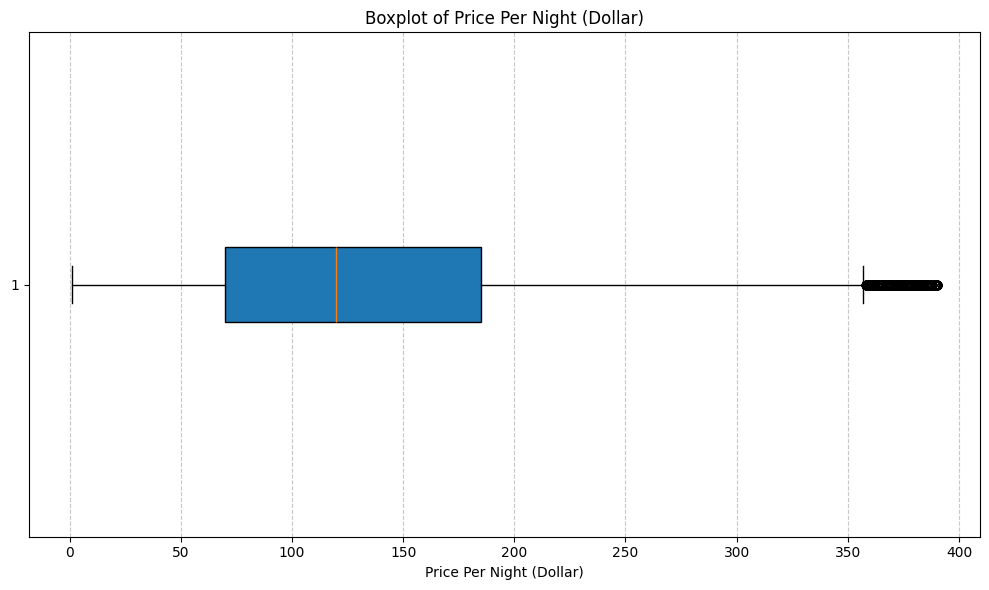

In [ ]:

london_rows = df.shape[0]
print(f"Number of datapoints (rows) after filtering for 'london': {london_rows}")

# Remove outliers from 'price_per_night_dollar'
Q1 = df["price_per_night_dollar"].quantile(0.25)
Q3 = df["price_per_night_dollar"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["price_per_night_dollar"] >= lower_bound) & (df["price_per_night_dollar"] <= upper_bound)]

rows_after_outlier_removal = df.shape[0]
print(f"Number of datapoints (rows) after outlier removal: {rows_after_outlier_removal}")


# Calculate the average price
average_price = df["price_per_night_dollar"].mean()
print(f"The average price per night is: ${average_price:.2f}")

plt.figure(figsize=(10, 6))
plt.boxplot(df["price_per_night_dollar"], vert=False, patch_artist=True)
plt.title("Boxplot of Price Per Night (Dollar)")
plt.xlabel("Price Per Night (Dollar)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The Boxplot confirmed that the data is now distributed more uniformly, with only small outliers between the range of 1 to 400.


**New Point of Interest Column and Correlation**

We scraped a lot of different point of interest data points (around fifty), depicting the amount of specific points of interests (e.g., museums, metro). As the high feature amount was difficult to utitlize within the current pipeline, we summarized it in three different features.


Correlation between POI columns and target variable:
sum_poi_500m: 0.2545
sum_poi_1000m: 0.2874
sum_poi_5000m: 0.3198


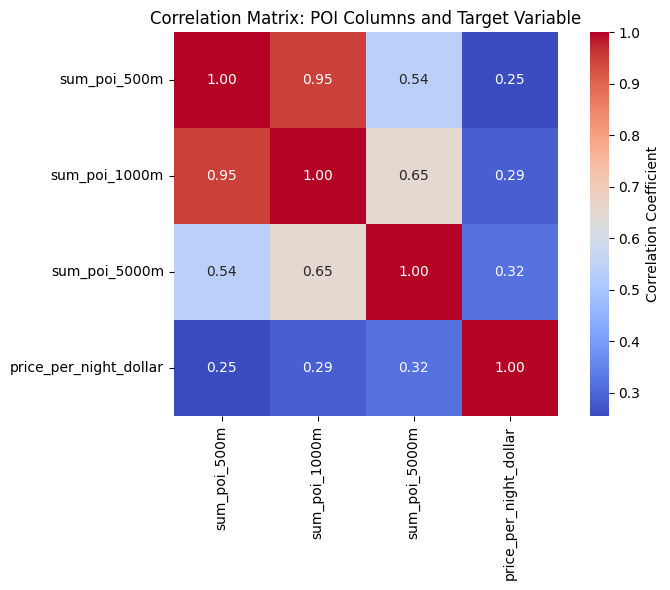

In [ ]:


# Summarize the columns ending with _500m, _1000m, _5000m
poi_500m_cols = [col for col in df.columns if col.endswith('_500m')]
poi_1000m_cols = [col for col in df.columns if col.endswith('_1000m')]
poi_5000m_cols = [col for col in df.columns if col.endswith('_5000m')]

# Create new summarized columns
df['sum_poi_500m'] = df[poi_500m_cols].sum(axis=1)
df['sum_poi_1000m'] = df[poi_1000m_cols].sum(axis=1)
df['sum_poi_5000m'] = df[poi_5000m_cols].sum(axis=1)

# Drop the original POI columns
df = df.drop(columns=poi_500m_cols + poi_1000m_cols + poi_5000m_cols)


# Calculate the correlation between new POI columns and the target variable
poi_columns = ['sum_poi_500m', 'sum_poi_1000m', 'sum_poi_5000m']
correlations = {}

for col in poi_columns:
    correlations[col] = df[col].corr(df["price_per_night_dollar"])

print("Correlation between POI columns and target variable:")
for col, corr_value in correlations.items():
    print(f"{col}: {corr_value:.4f}")

# Calculate the correlation data
correlation_data = df[poi_columns + ["price_per_night_dollar"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix: POI Columns and Target Variable")
plt.tight_layout()
plt.show()


I primarily checkd if the new data columns have a correlation to the target class (price per nicht dollar). This should show if the further calculation of the metric makes sense at all. With correlations between 0.25 to 0.32, it showed a week correlation. Nevertheless, there could be usable information inside.

Start ML Pipeline

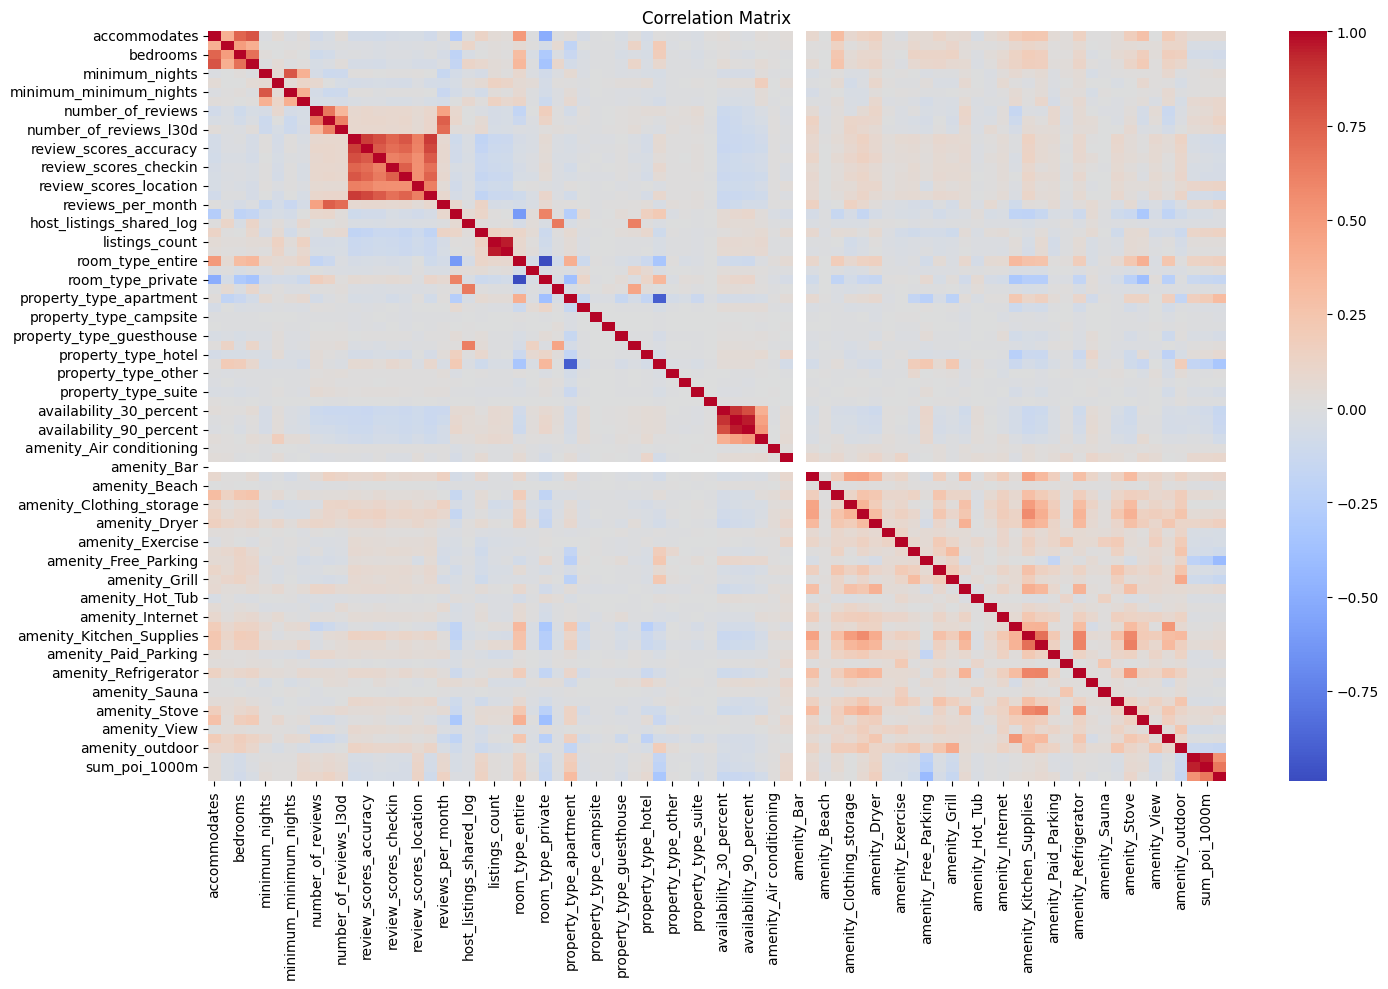

In [ ]:
target_column = "price_per_night_dollar"
X = df.drop(columns=[target_column])
y = df[target_column]


# Calculate the correlation matrix for all features
#does not improve prediction
correlation_matrix = X.corr(method='pearson')


# Create and save the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In the current preprocessing step. I checked for high correlations between the training features. Pearson correlations above 0.9 will be eliminate because of potential redundant information. This should further allow to trimm the features and allow for a more targeted machine learning pipeline.

Train Test Split And Filtering

In [ ]:
# Identify highly correlated features (threshold > 0.9)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X = X.drop(columns=high_corr_features)

print(f"Features dropped due to high correlation: {high_corr_features}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Features dropped due to high correlation: ['listings_count_total', 'availability_60_percent', 'availability_90_percent', 'sum_poi_1000m']


I decided to keep the training-test split of 90/10, as we have a high sample size of about 50.000 samples. In any case, it showed very small improvements of accuracy in this setting compared to the prior setting of 80/20.

Scaling

In [ ]:
# Choose Scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I tried two different scaling methods and also without it. No application changed the results. Because of this, I kept the MinMaxScaller as a basis.

Linear Regression


Linear Regression Cross-Validation Results (5-Fold):
Average MAE (CV): 34.96
Average MSE (CV): 2300.68
Average R-squared (CV): 0.66

Linear Regression Test Set Results:
Mean Squared Error (MSE): 2252.09
Mean Absolute Error (MAE): 34.33
Mean Absolute Percentage Error (MAPE): 29.78%
R-squared (R2): 0.65
Explained Variance Score: 0.65


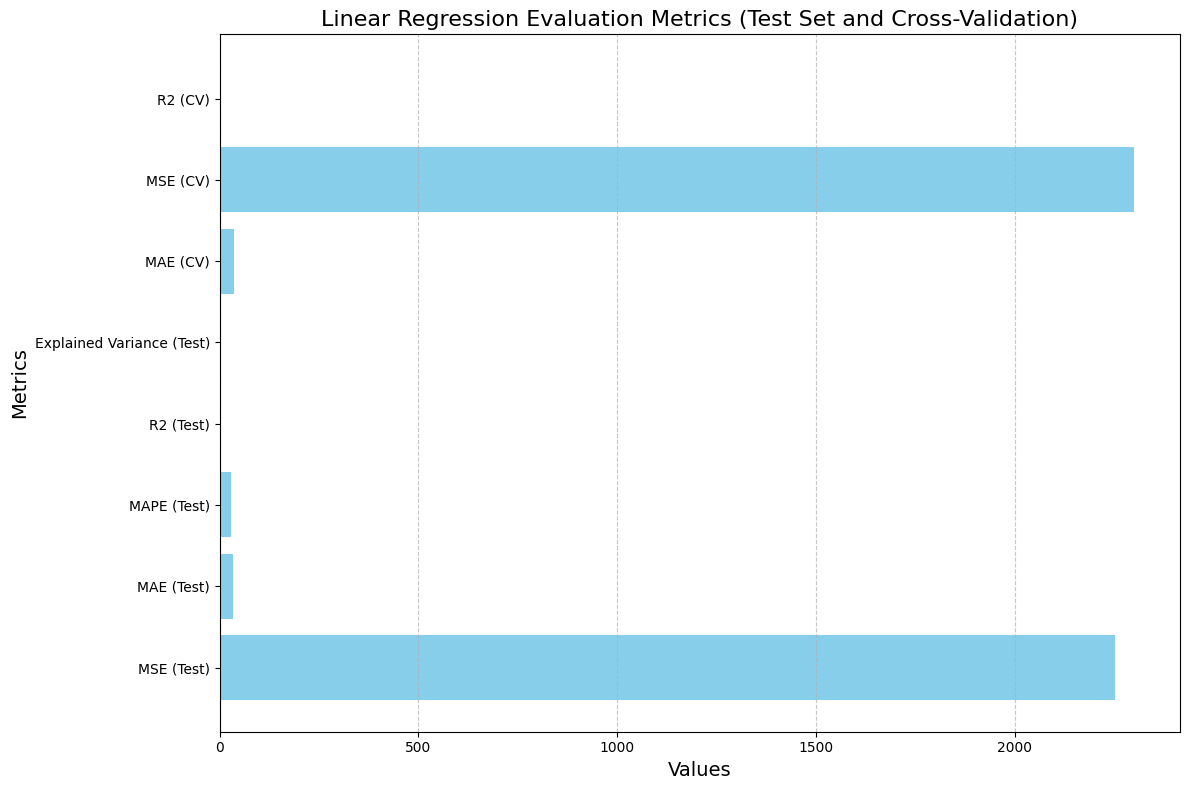

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

linear_model = LinearRegression()

# cross validation
cv_results_mae = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=kfold
)
cv_results_mse = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kfold
)
cv_results_r2 = cross_val_score(
    linear_model, X_train_scaled, y_train, scoring='r2', cv=kfold
)

# Calculate the average metrics from cross-validation
avg_mae_cv = -np.mean(cv_results_mae)
avg_mse_cv = -np.mean(cv_results_mse)
avg_r2_cv = np.mean(cv_results_r2)


linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)


mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
r2_lr = r2_score(y_test, y_pred_lr)
explained_var_lr = explained_variance_score(y_test, y_pred_lr)


print("\nLinear Regression Cross-Validation Results (5-Fold):")
print(f"Average MAE (CV): {avg_mae_cv:.2f}")
print(f"Average MSE (CV): {avg_mse_cv:.2f}")
print(f"Average R-squared (CV): {avg_r2_cv:.2f}")

print("\nLinear Regression Test Set Results:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")
print(f"R-squared (R2): {r2_lr:.2f}")
print(f"Explained Variance Score: {explained_var_lr:.2f}")


metrics = ['MSE (Test)', 'MAE (Test)', 'MAPE (Test)', 'R2 (Test)', 'Explained Variance (Test)',
           'MAE (CV)', 'MSE (CV)', 'R2 (CV)']
values = [mse_lr, mae_lr, mape_lr, r2_lr, explained_var_lr, avg_mae_cv, avg_mse_cv, avg_r2_cv]


In the beginning, I wanted to try a fast and simple algorithm to model the airbnb prices. With a linear approach, I am also able to use the coefficients as a metric that shows the importance of individual features to the prediction. This interpretability will be later used in the feature importance analysis. I also employed a 5 fold cross-validation to get a better understanding of the ability of the algorithm to generalize. My primariy target for comparison was the MAE (Mean Absolute Error) as it gives me a concrete feeling of the usability of the linear approach. With an MAE of 34.33, it was already quite ok considering how simple the approach is.
As there are not hyperparameters for this method, I could not deploy a gridsearch approach.

Ridge Regression

In [ ]:

ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}
"""
ridge_params = {
    'alpha': [0.01],
    'solver': ['auto']
}
"""

ridge_model = Ridge()

# Grid Search
ridge_grid = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

ridge_grid.fit(X_train_scaled, y_train)

print("\nBest parameters for Ridge Regression:", ridge_grid.best_params_)
print("Best score for Ridge Regression (MSE):", -ridge_grid.best_score_)

best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100
r2_ridge = r2_score(y_test, y_pred_ridge)
explained_var_ridge = explained_variance_score(y_test, y_pred_ridge)


print("\nRidge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%")
print(f"R-squared (R2): {r2_ridge:.2f}")
print(f"Explained Variance Score: {explained_var_ridge:.2f}")


metrics = ['MSE', 'MAE', 'MAPE', 'R2', 'Explained Variance']
values = [mse_ridge, mae_ridge, mape_ridge, r2_ridge, explained_var_ridge]



Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best parameters for Ridge Regression: {'alpha': 0.1, 'solver': 'lsqr'}
Best score for Ridge Regression (MSE): 2301.1290485790146

Ridge Regression Evaluation:
Mean Squared Error (MSE): 2251.32
Mean Absolute Error (MAE): 34.34
Mean Absolute Percentage Error (MAPE): 29.78%
R-squared (R2): 0.65
Explained Variance Score: 0.65


I chose the ridge regression as the second algorithm, as I wanted to see if the ability to model non-linear dynamics can increase the model. I also implemented a gridsearch approach to find optimal hyperparameter settings. Interstingly, the ridge regression algorithm did not improve the quality metrics.

XGBoost

In [ ]:

n_estimators_options = [100, 1000]
learning_rate_options = [0.01, 0.1]
max_depth_options = [3, 10]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_params = None
best_mae = float('inf')

# Custom GridSearch
for n_estimators in n_estimators_options:
    for learning_rate in learning_rate_options:
        for max_depth in max_depth_options:
            mae_scores = []

            #cross validation
            for train_idx, val_idx in kfold.split(X_train_scaled):
                X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
                y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]


                xgb_model = xgb.XGBRegressor(
                    n_estimators=n_estimators,
                    learning_rate=learning_rate,
                    max_depth=max_depth,
                    random_state=42,
                    verbosity=0
                )
                xgb_model.fit(X_train_cv, y_train_cv)


                y_pred_cv = xgb_model.predict(X_val_cv)
                mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))

            # average MAE across folds
            avg_mae = np.mean(mae_scores)

            # check if current one is better
            if avg_mae < best_mae:
                best_mae = avg_mae
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Train the best XGBoost model on the entire training set
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the best model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
r2_xgb = r2_score(y_test, y_pred_xgb)
explained_var_xgb = explained_variance_score(y_test, y_pred_xgb)

# Print results
print("\nBest Parameters for XGBoost:", best_params)
print(f"Best MAE from Cross-Validation: {best_mae:.2f}")
print("\nXGBoost Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")
print(f"R-squared (R2): {r2_xgb:.2f}")
print(f"Explained Variance Score: {explained_var_xgb:.2f}")


###### Regular XGB for Comparison
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05, #0.1
    max_depth=10, #6
    random_state=42,
    verbosity=1
)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
explained_var_xgb = explained_variance_score(y_test, y_pred_xgb)

print("\nXGBoost Results:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb * 100:.2f}%")
print(f"R-squared (R2): {r2_xgb:.2f}")
print(f"Explained Variance Score: {explained_var_xgb:.2f}")

xgb_importance = xgb_model.feature_importances_

# Create a DataFrame for visualization
xgb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 10))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance for XGBoost", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=8)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()


plt.show()


As the third algorithn, I chose a tree-based boosting approach. As the xgboost algorithm doesnt support gridsearch, I had to code it manually. I chose three hyperparameters to tune, as the speed of the algorithm is not the fastest as well. However, the MAE could be improved to 27.58, which rendered this approach the best one of all the deployed algorithm. Also, I compared it to the standard implemention of XGBoost, which got that accuracy already out of the box.
As this was the best algorithm, I deployed a feature importance directly. Hereby, I could see that the most important features were "room_type_entire", "property_type_hotel", "room_type_hotel".

KNN

In [ ]:

knn_params = {
    'n_neighbors': [3, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsRegressor()


knn_grid = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

knn_grid.fit(X_train_scaled, y_train)

print("\nBest parameters for KNN Regressor:", knn_grid.best_params_)
print("Best score for KNN Regressor (MSE):", -knn_grid.best_score_)


best_knn_model = knn_grid.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn) * 100
r2_knn = r2_score(y_test, y_pred_knn)
explained_var_knn = explained_variance_score(y_test, y_pred_knn)


print("\nKNN Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_knn:.2f}%")
print(f"R-squared (R2): {r2_knn:.2f}")
print(f"Explained Variance Score: {explained_var_knn:.2f}")


metrics = ['MSE', 'MAE', 'MAPE', 'R2', 'Explained Variance']
values = [mse_knn, mae_knn, mape_knn, r2_knn, explained_var_knn]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.title("KNN Regressor Evaluation Metrics", fontsize=14)
plt.ylabel("Values", fontsize=12)
plt.tight_layout()
plt.show()


To have a variety of different algorithms, I already tested KNN. Here I had to limit the hyperparameter search space a bit as the algorithms performance is also not very fast. In the end, it was shown that the algorithm had the worst performance copared to the previous three.

Feature Importance

In [ ]:
lr_importance = np.abs(linear_model.coef_)
lr_importance = lr_importance / lr_importance.sum()

ridge_importance = np.abs(best_ridge_model.coef_)
ridge_importance = ridge_importance / ridge_importance.sum()

xgb_importance = xgb_model.feature_importances_
xgb_importance = xgb_importance / xgb_importance.sum()


# Create a DataFrame for comparison
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': lr_importance,
    'Ridge Regression': ridge_importance,
    'XGBoost': xgb_importance,
}).set_index('Feature')

# Get the top 10 features by average importance across models
importance_df['Average Importance'] = importance_df.mean(axis=1)
top_features = importance_df.sort_values(by='Average Importance', ascending=False).head(10)

top_features.plot(kind='barh', figsize=(12, 8), title="Top 10 Features by Importance Across Models")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


########### Summary of results ########

mae_values = {
    'Linear Regression': mae_lr,
    'Ridge Regression': mean_absolute_error(y_test, y_pred_ridge),
    'XGBoost': mean_absolute_error(y_test, y_pred_xgb),
    'KNN Regressor': mean_absolute_error(y_test, y_pred_knn)  # Include KNN MAE
}


mae_df = pd.DataFrame(list(mae_values.items()), columns=['Model', 'MAE'])

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
plt.title("Mean Absolute Error (MAE) Comparison Across Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("MAE", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

One of the primary questions within the research question was, if the points of interests had an effect on the prediction. To explore this, I deployed the feature importance analysis. The importance in linear regression is determined by the absolute value of coefficients, in ridge regression by the penalized coefficients considering regularization, and in XGBoost by metrics like gain, frequency, or coverage across tree splits where the feature is used. As I already calculated the feature importance of the best algorithm (xgboost), I was interested how much the features have been used over all algorithms. For this, I calculated the averages and visualized it. This highlighted some other features, such as "room_type_entire" (which was not used much in the linear and ridge approach), "bedroom", and "property_type_hotel". Interestingly, ther was no feature that had a high importance for all algorithms.

SHAP Analysis

In [ ]:

# Linear Regression
explainer_lr = shap.Explainer(linear_model.predict, X_train_scaled)
shap_values_lr = explainer_lr(X_test_scaled)

# Ridge Regression
explainer_ridge = shap.Explainer(best_ridge_model.predict, X_train_scaled)
shap_values_ridge = explainer_ridge(X_test_scaled)

# XGBoost
explainer_xgb = shap.Explainer(xgb_model, X_train_scaled)
shap_values_xgb = explainer_xgb(X_test_scaled)


# Visualizations
shap.summary_plot(
    shap_values_lr,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.tight_layout()
plt.show()


shap.summary_plot(
    shap_values_ridge,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.tight_layout()
plt.show()


shap.summary_plot(
    shap_values_xgb,
    X_test_scaled,
    feature_names=X.columns,
    show=False
)
plt.tight_layout()
plt.show()